# 데이터 로드
* 데이터 출처 링크 : https://github.com/bab2min/corpus/tree/master/sentiment

In [1]:
import re # 정규표현식
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

import urllib.request # url 검색 모듈
from collections import Counter

from sklearn.model_selection import train_test_split

plt.rcParams['font.family'] = 'NanumGothic'

In [2]:
# 전체 데이터에 해당하는 naver_shopping.txt 다운로드 하기
urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/10.%20RNN%20Text%20Classification/dataset/naver_shopping.txt", filename="naver_shopping.txt")

('naver_shopping.txt', <http.client.HTTPMessage at 0x1f8ea911250>)

In [3]:
total_data = pd.read_table('naver_shopping.txt', names=['ratings', 'reviews'])
print(total_data.shape)
total_data.head(2)

(200000, 2)


,ratings,reviews
0,5,배공빠르고 굿
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고


In [4]:
print('전체 리뷰 수 :', len(total_data))

전체 리뷰 수 : 200000


In [5]:
total_data.columns

Index(['ratings', 'reviews'], dtype='object')

In [6]:
total_data.ratings.value_counts()

ratings
5    81177
2    63989
1    36048
4    18786
Name: count, dtype: int64

## train, test 분리

In [7]:
# 긍정 조건
condition = (total_data.ratings > 3)

total_data[condition]

,ratings,reviews
0,5,배공빠르고 굿
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...
4,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ
10,5,사이즈도 딱이고 귀엽고 넘 좋아요 ㅎㅎ
14,5,촉감도 좋고 무게감이나 핏도 편합니다
...,...,...
199994,4,전반적으로 어플이나 각종 IOT서비스와의 완성도는 좋음 그러나 서버의 잦은 다운과 ...
199996,5,다이슨 케이스 구매했어요 다이슨 슈퍼소닉 드라이기 케이스 구매했어요가격 괜찮고 배송...
199997,5,로드샾에서 사는것보다 세배 저렴하네요 ㅜㅜ 자주이용할께요
199998,5,넘이쁘고 쎄련되보이네요~


In [8]:
# np.select()
# 긍정 - 4 or 5 >> 1, 부정 - 1 or 2 >> 0

# [조건], [chioce], default=0
total_data['label'] = np.select([total_data.ratings > 3], [1], default=0)
total_data.head(2)

,ratings,reviews,label
0,5,배공빠르고 굿,1
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고,0


In [9]:
# 각 열에 대해 중복 제외 샘플 카운팅
total_data.ratings.nunique() # rating 개수 : 4개

4

In [10]:
# 리뷰 중복 확인
total_data.reviews.nunique() # 중복 있다는 것을 확인함. / 리뷰 개수 : 199908

199908

In [11]:
# 중복 제거하기
total_data.drop_duplicates(subset=['reviews'], inplace=True)
print(total_data.shape)
total_data.head(2)

(199908, 3)


,ratings,reviews,label
0,5,배공빠르고 굿,1
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고,0


In [12]:
print(f'전체 리뷰 수 : {total_data.shape[0]}')

전체 리뷰 수 : 199908


In [13]:
# 결측치 확인하기
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199908 entries, 0 to 199999
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   ratings  199908 non-null  int64 
 1   reviews  199908 non-null  object
 2   label    199908 non-null  int32 
dtypes: int32(1), int64(1), object(1)
memory usage: 5.3+ MB


In [14]:
total_data.isnull().sum()

ratings    0
reviews    0
label      0
dtype: int64

In [15]:
total_data.isnull().values.any()

False

In [16]:
# 훈련용 데이터 : 테스트 데이터 = 3 : 1
# X, y를 나누지 않는 이유는 리뷰데이터는 정답이 없기 때문이다.
train_data, test_data = \
train_test_split(total_data, test_size=0.25, random_state=42)

In [17]:
print(f'train data : {len(train_data)}개\ntest data : {len(test_data)}개')

train data : 149931개
test data : 49977개


In [18]:
# EDA
train_data.label.value_counts()

label
1    75013
0    74918
Name: count, dtype: int64

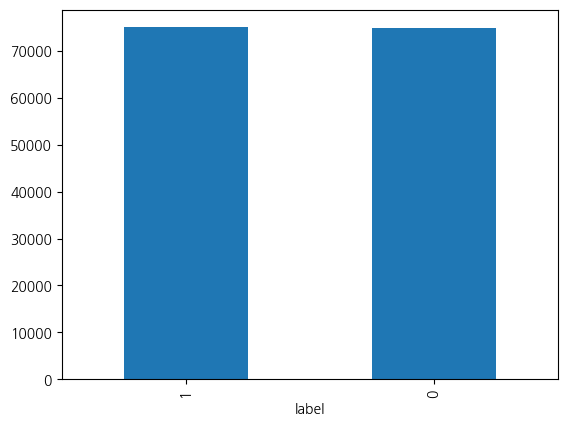

In [19]:
# 그래프 그려보기
train_data.label.value_counts().plot(kind='bar')
plt.show()

In [20]:
train_data.groupby('label').size().reset_index(name='count')

,label,count
0,0,74918
1,1,75013


# 실전 모델링 - 딥러닝 활용 감성분석
* https://huggingface.co/matthewburke/korean_sentiment

In [21]:
# !pip install transformers

In [22]:
# !pip install tensorflow

In [23]:
# !pip install torch

In [24]:
# 허깅페이스 모델 예제
from transformers import pipeline

classifier = pipeline("text-classification", model="matthewburke/korean_sentiment")
custom_tweet = "영화 재밌다."
preds = classifier(custom_tweet, return_all_scores=True)
is_positive = preds[0][1]['score'] > 0.5

OSError: [WinError 126] 지정된 모듈을 찾을 수 없습니다. Error loading "C:\Users\tjdtn\AppData\Roaming\Python\Python311\site-packages\torch\lib\shm.dll" or one of its dependencies.